## Analysis

In [1]:
import pandas as pd
from klym.core.eda import PreprocessEda
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.set_option("display.max_columns", None)

## Extracting Data

In [2]:
df_counties = pd.read_csv("../data/counties.csv", sep=";")
df_crashpoverty = pd.read_csv("../data/crashes_poverty.csv", sep=";")
df_vehicles = pd.read_csv("../data/vehicles.csv")

eda_vehicles = PreprocessEda()
eda_counties = PreprocessEda()
eda_crashpoverty = PreprocessEda()

scaler = MinMaxScaler()
label_encoder = LabelEncoder()

In [3]:
df_counties.head(5)

,State,Abbreviation,Postal\ncode
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,American Samoa,,AS
3,Arizona,Ariz.,AZ
4,Arkansas,Ark.,AR


In [4]:
df_crashpoverty.head(5)

,State,Number of Crashes,Poverty
0,Florida,1011,13.7
1,Tennessee,437,15.2
2,New Mexico,344,18.8
3,Alabama,336,16.8
4,Louisiana,271,18.7


In [5]:
df_vehicles.head(5)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,description,county,state,lat,long
0,palm springs,3400,2002.0,volkswagen,jetta gls,excellent,4 cylinders,gas,100000.0,clean,automatic,WVWSK61J62W209823,NaN,NaN,wagon,NaN,This 2002 Volkswagen Jetta GLS Wagon is simply...,NaN,ca,33.7451,-116.3520
1,salem,6300,2004.0,chevrolet,silverado 2500 crew cab,NaN,8 cylinders,gas,208942.0,clean,automatic,1GCHK23U94F144317,4wd,NaN,pickup,white,We want to let you know up front that Synergiz...,NaN,or,44.9225,-123.3200
2,long island,9997,2011.0,nissan,xterra,excellent,NaN,gas,125666.0,clean,automatic,5N1AN0NWXBC502031,NaN,NaN,NaN,NaN,Year : 2011 \t\t Make : NISSAN \t\t\tMode...,NaN,ny,40.8004,-73.0058
3,amarillo,21504,2017.0,chevrolet,malibu,NaN,4 cylinders,gas,24218.0,clean,automatic,NaN,fwd,mid-size,sedan,red,Use this link to see more information on this ...,NaN,tx,35.1773,-101.7940
4,inland empire,28900,2009.0,cadillac,cts-v,excellent,8 cylinders,gas,61000.0,clean,automatic,NaN,rwd,mid-size,sedan,silver,"2009 CTS-V, FAST! Awesome car, super clean, we...",NaN,ca,33.9748,-117.5580


## Exploratory Data Analysis

### Structure Analysis

In [6]:
print(df_vehicles.shape)
print(df_crashpoverty.shape)
print(df_counties.shape)

(26988, 21)
(50, 3)
(59, 3)


In [7]:
structure_information_vehicles = eda_vehicles.structtype_info(df_vehicles).to_dataframe()
structure_information_counties = eda_counties.structtype_info(df_counties).to_dataframe()
structure_information_crashpoverty = eda_crashpoverty.structtype_info(df_crashpoverty).to_dataframe()

print(f"Struct information of Vehicles: \n\n{structure_information_vehicles}\n\n")
print(f"Struct information of Counties: \n\n{structure_information_counties}\n\n")
print(f"Struct information of Crash Poverty: \n\n{structure_information_crashpoverty}\n\n")

Struct information of Vehicles: 

  datatypes  frequency                                            columns
0    object         15  [region, manufacturer, model, condition, cylin...
1   float64          5                [year, odometer, county, lat, long]
2     int64          1                                            [price]


Struct information of Counties: 

  datatypes  frequency                              columns
0    object          3  [State, Abbreviation, Postal\ncode]


Struct information of Crash Poverty: 

  datatypes  frequency              columns
0    object          1              [State]
1     int64          1  [Number of Crashes]
2   float64          1            [Poverty]




### Duplicated

In [8]:
duplicates_vehicle = len(df_vehicles[df_vehicles.duplicated(keep=False)])
duplicates_county = len(df_counties[df_counties.duplicated(keep=False)])
duplicates_crashpoverty = len(df_crashpoverty[df_crashpoverty.duplicated(keep=False)])

print(f"Duplicated of vehicles dataset: {duplicates_vehicle}\n\n")
print(f"Duplicated of county dataset: {duplicates_county}\n\n")
print(f"Duplicated of crashpoverty dataset: {duplicates_crashpoverty}\n\n")

if duplicates_vehicle > 0:
    df_vehicles = df_vehicles.drop_duplicates(keep="first")
if duplicates_county > 0:
    duplicates_county = duplicates_county.drop_duplicates(keep="first")
if duplicates_crashpoverty > 0:
    duplicates_crashpoverty = duplicates_crashpoverty.drop_duplicates(keep="first")


Duplicated of vehicles dataset: 434


Duplicated of county dataset: 0


Duplicated of crashpoverty dataset: 0




In [9]:
max_duplicated_vin = df_vehicles.loc[df_vehicles["vin"].duplicated()]["vin"].value_counts().max()
mean_duplicated_vin = df_vehicles.loc[df_vehicles["vin"].duplicated()]["vin"].value_counts().mean()
std_duplicated_vin = df_vehicles.loc[df_vehicles["vin"].duplicated()]["vin"].value_counts().std()

print(f"Max value duplicated per VIN: {max_duplicated_vin}\n\n")
print(f"Mean value duplicated: {mean_duplicated_vin}\n\n")
print(f"Std value duplicated: {std_duplicated_vin}\n\n")


Max value duplicated per VIN: 12


Mean value duplicated: 1.253125


Std value duplicated: 0.6692178873979289




In [10]:
region_count = df_vehicles.groupby(['vin', 'state', 'region', 'odometer', 'price']).size().reset_index(name="count")
region_count = region_count.sort_values(ascending=False, by=['count'])
region_count

,vin,state,region,odometer,price,count
12164,JH4KB16647C003270,ca,yuba-sutter,116779.0,8999,4
5539,1HGCM66556A014875,ca,san luis obispo,199866.0,4995,4
13072,JTKKT604260166852,ca,yuba-sutter,71439.0,6999,4
8016,2T2HA31U24C027906,ca,palm springs,131000.0,6500,4
4167,1GBJC34U46E278572,ca,yuba-sutter,41680.0,19999,4
...,...,...,...,...,...,...
5101,1GNSCAE03DR278382,tx,austin,108000.0,0,1
5102,1GNSCAKC2FR131665,tx,houston,84363.0,27995,1
5103,1GNSCBE02CR110155,ca,ventura county,131025.0,17995,1
5104,1GNSCBE03BR155362,tx,victoria,126391.0,16999,1


In [11]:
region_count["vin"].value_counts().head(6)

vin
WDZPE7CC9D5767661    12
WP0CA2991XS652065     7
1FTEW1CPXGKE39286     5
1ZVBP8FF4C5208577     5
1FA6P8TH4H5217450     5
1FTEW1CP1HKC20511     5
Name: count, dtype: int64

In [12]:
region_count[region_count["vin"].isin(["WDZPE7CC9D5767661"])]

,vin,state,region,odometer,price,count
14785,WDZPE7CC9D5767661,ca,stockton,23893.0,34900,2
14794,WDZPE7CC9D5767661,oh,columbus,23893.0,34900,1
14784,WDZPE7CC9D5767661,ca,imperial county,23893.0,34900,1
14786,WDZPE7CC9D5767661,ca,ventura county,23893.0,34900,1
14787,WDZPE7CC9D5767661,fl,north central FL,23893.0,34900,1
14788,WDZPE7CC9D5767661,fl,space coast,23893.0,34900,1
14789,WDZPE7CC9D5767661,fl,tampa bay area,23893.0,34900,1
14790,WDZPE7CC9D5767661,nc,greensboro,23893.0,34900,1
14791,WDZPE7CC9D5767661,ne,lincoln,23893.0,34900,1
14792,WDZPE7CC9D5767661,nj,north jersey,23893.0,34900,1


In [13]:
region_count[region_count["vin"].isin(["1FTEW1CP1HKC20511"])]

,vin,state,region,odometer,price,count
2494,1FTEW1CP1HKC20511,ca,fresno / madera,49156.0,25000,1
2495,1FTEW1CP1HKC20511,ca,inland empire,49156.0,25000,1
2496,1FTEW1CP1HKC20511,ca,santa barbara,49156.0,25000,1
2497,1FTEW1CP1HKC20511,ca,ventura county,49156.0,25000,1
2498,1FTEW1CP1HKC20511,ca,visalia-tulare,49156.0,25000,1


In [14]:
uniques, counts = np.unique(df_vehicles["vin"].tolist(), return_counts=True)
duplicated_vins = uniques[counts > 1]

df_same_vehicle = pd.DataFrame()
df_different_vehicle = pd.DataFrame()
TEMPORAL_VIN = "VIN_TEMP_"
i_TEMPORAL_VIN_NAME = 0

for vin in duplicated_vins:
    df_temp = df_vehicles[df_vehicles["vin"].isin([vin])]
    df_temp = df_temp.drop(["type", "paint_color", "description", "county", "lat", "long", "drive"], axis=1)

    if df_temp.duplicated(keep=False).sum() > 0:
        for column in df_temp.columns:
            if column == "region" or column == "price" or column == "state":
                continue
            else:
                if len(df_temp[column].unique()) > 1:
                    if pd.isna(df_temp[column]).any():
                        non_nan_value = df_temp[column][~pd.isna(df_temp[column])]
                        df_temp[column] = non_nan_value.values[0]
                    else:
                        df_temp[column] = df_temp[column].unique()[0]
        
        df_temp = df_temp.drop_duplicates(keep="first")
        df_same_vehicle = pd.concat([df_same_vehicle, df_temp], axis=0)
        
    else:
        if len(df_temp["odometer"].unique()) == 1:
            df_different_vehicle = pd.concat([df_different_vehicle, df_temp], axis=0)

        else:
            for index in df_temp.index.tolist():
                df_temp.loc[index, "vin"] = f"{TEMPORAL_VIN}{i_TEMPORAL_VIN_NAME}"
                i_TEMPORAL_VIN_NAME += 1
            
            df_different_vehicle = pd.concat([df_different_vehicle, df_temp], axis=0)

df_vehicles_with_and_without_vehicles = pd.concat([df_same_vehicle, df_different_vehicle], axis=0)

In [15]:
df_vehicles_transformed = df_vehicles.loc[df_vehicles["vin"].isin(list(set(df_vehicles["vin"].tolist()).difference(set(duplicated_vins))))]
df_vehicles_transformed = df_vehicles.drop(["type", "paint_color", "description", "county", "lat", "long", "drive"], axis=1)
df_vehicles_transformed = pd.concat([df_vehicles_with_and_without_vehicles, df_vehicles_transformed], axis=0)
df_vehicles_transformed = df_vehicles_transformed.drop_duplicates()

* Se hacen búsquedas sobre el dataset de vehículos de forma completa. La idea es que los datos completamente duplicados puedan ser eliminados ya que agregarían ruido al modelo.

* Se realiza una búsqueda directa de duplicados por VIN. Se asume que cada carro debe tener un único VIN por lo que no pueden existir dos carros con el mismo. Sin embargo, se pueden tener algunas consideraciones. Por ejemplo: 

    1. Un mismo carro (basado en el VIN) puede estar duplicado en diferentes estados y regiones, siempre y cuando sea el mismo carro. Es decir, que el carro debe tener las mismas características para que ésto ocurra. Si por alguna razón el carro no tiene las mismas características como el odometro se elimina este dato pero si algunas características son diferentes y el odometro es el mismo, las características diferentes pueden ser imputadas. El proceso de imputación puede ser, reemplazar los valores nan por uno de los valores diferentes entre los registros diferentes o simplemente escoger uno de los valores diferentes entre los registros en caso de que ninguno sea nan.

    2. Existen VIN creados con números que se asumen no cumplen con un número de VIN real, el criterio aquí, no es buscar realmente si el VIN es válido o no, dado que si los datos se ingestan por sistema los usuarios pueden omitir esta información, más esto no significa que el carro no sea real y que no exista, por lo que cada VIN repetido que se evidencie que las características pertenezcan a carros diferentes, se cambiará el nombre de cada VIN por uno genérico para no añadir ruido al modelo.

* Existen algunos features que no son relevantes para el ejercicio que son eliminadas en el proceso. 

### Frequency Analysis

In [16]:
def plot_feature_info(features, title, column, sep):
    sns.barplot(x="Features", y=column, data=features)
    for index, row in features.iterrows():
        plt.text(index, row[column] + sep, str(row[column]), color='black', ha='center', fontsize=8)
    plt.title(title)
    plt.xlabel('Features')
    plt.ylabel(column)
    plt.xticks(rotation=45)
    plt.xticks(rotation=45, ha='right')

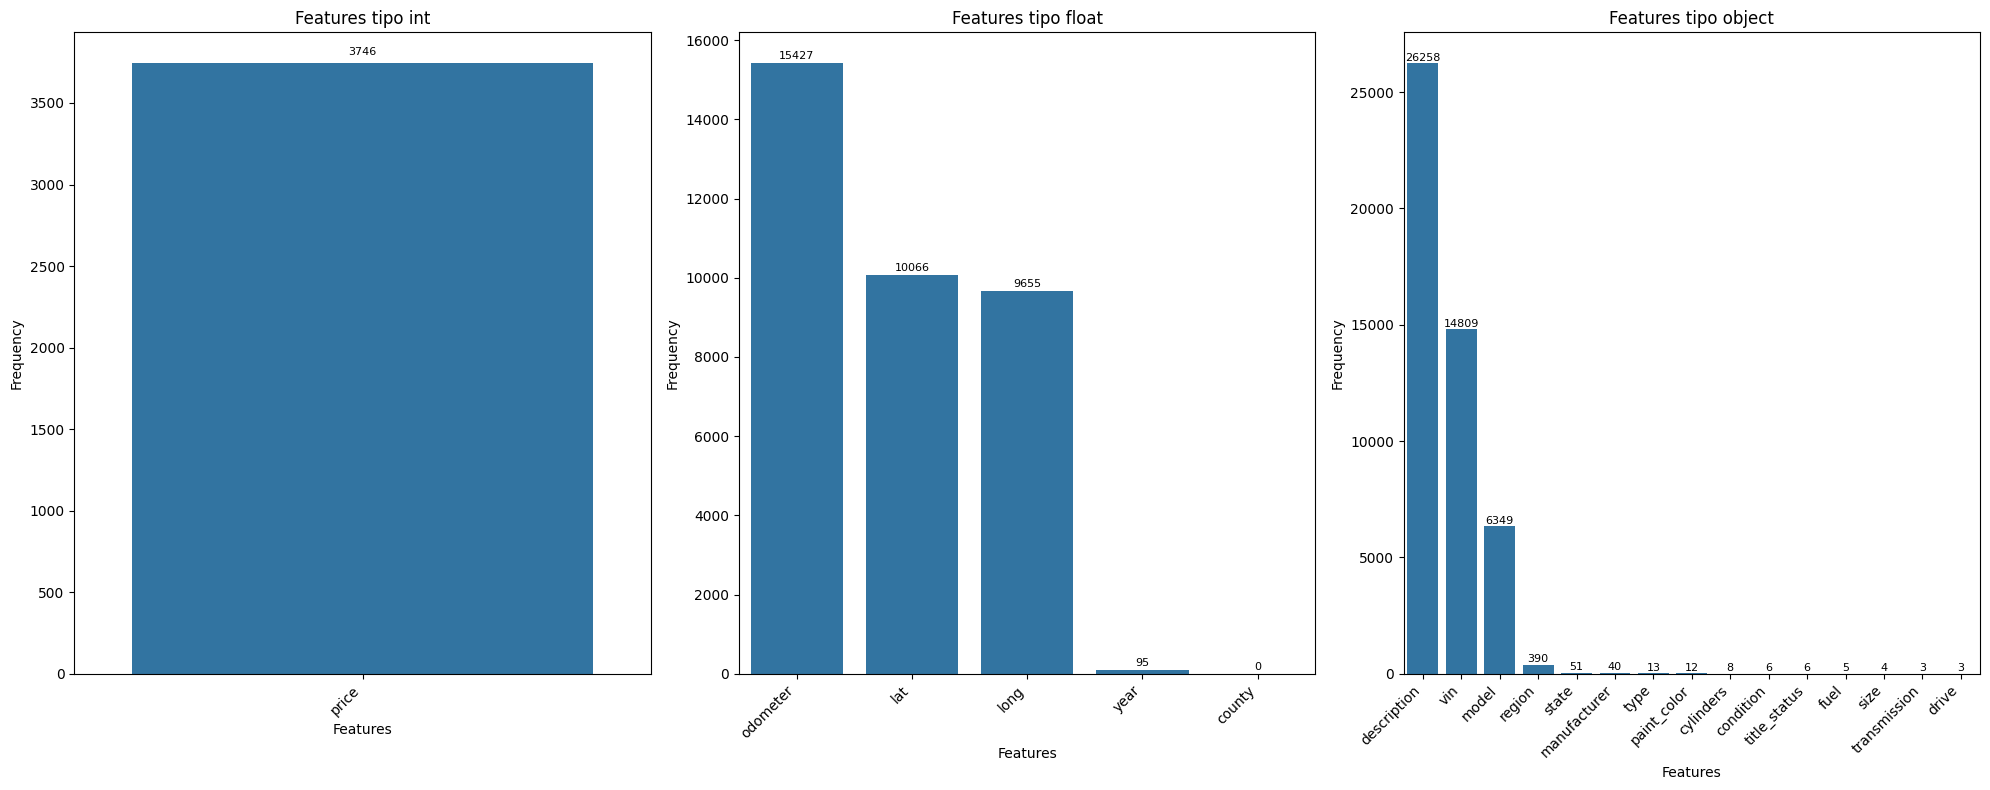

In [17]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 3, 1)
plot_feature_info(eda_vehicles.feature_info(df_vehicles, "int"), 'Features tipo int', "Frequency", 50)

plt.subplot(1, 3, 2)
plot_feature_info(eda_vehicles.feature_info(df_vehicles, "float"), 'Features tipo float', "Frequency",100)

plt.subplot(1, 3, 3)
plot_feature_info(eda_vehicles.feature_info(df_vehicles, "object"), 'Features tipo object', "Frequency",100)

plt.tight_layout()
plt.show()

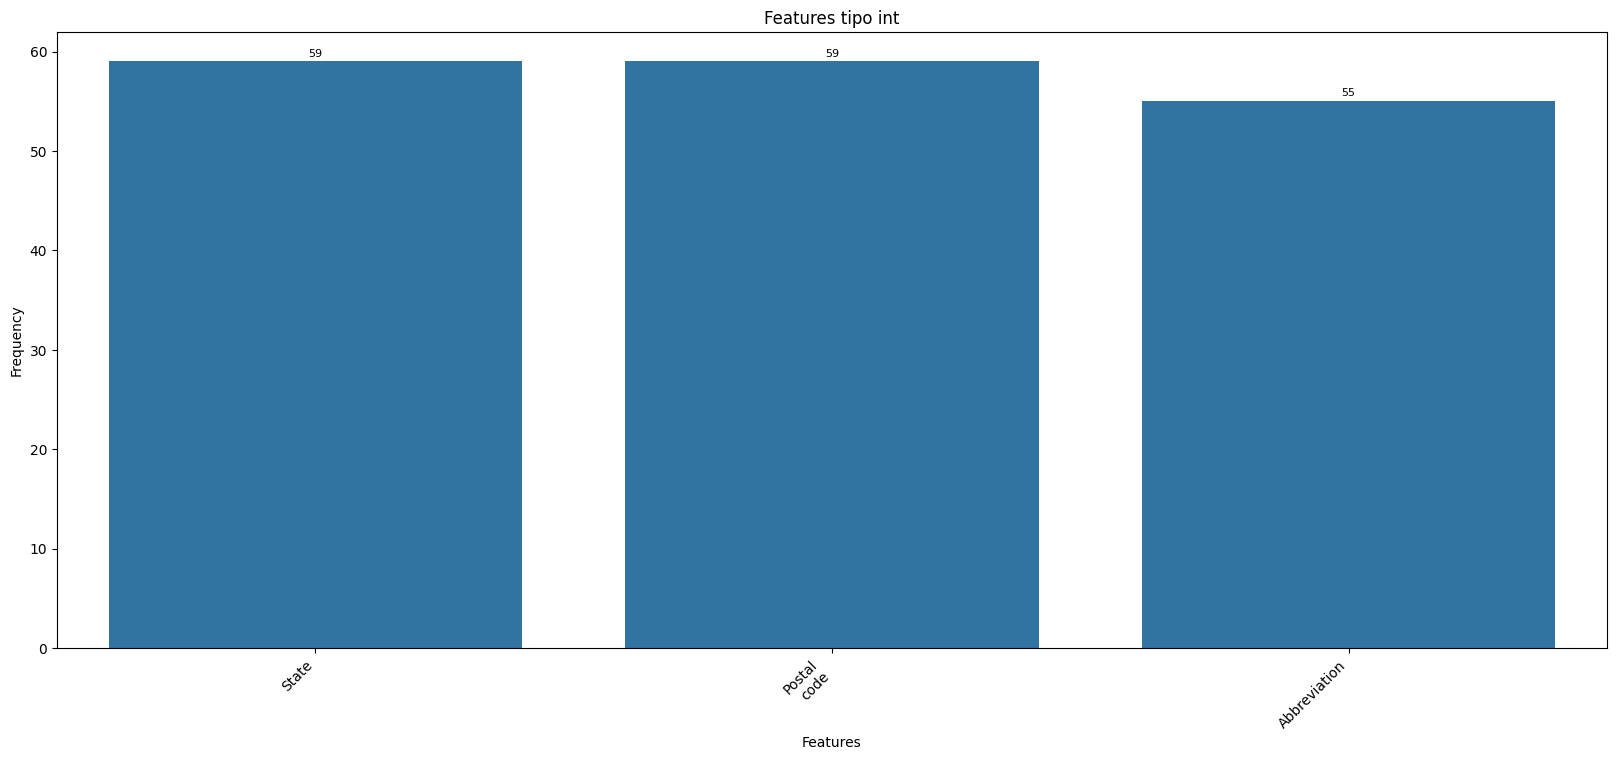

In [18]:
plt.figure(figsize=(20, 8))

plot_feature_info(eda_counties.feature_info(df_counties, "object"), 'Features tipo int', "Frequency",0.5)

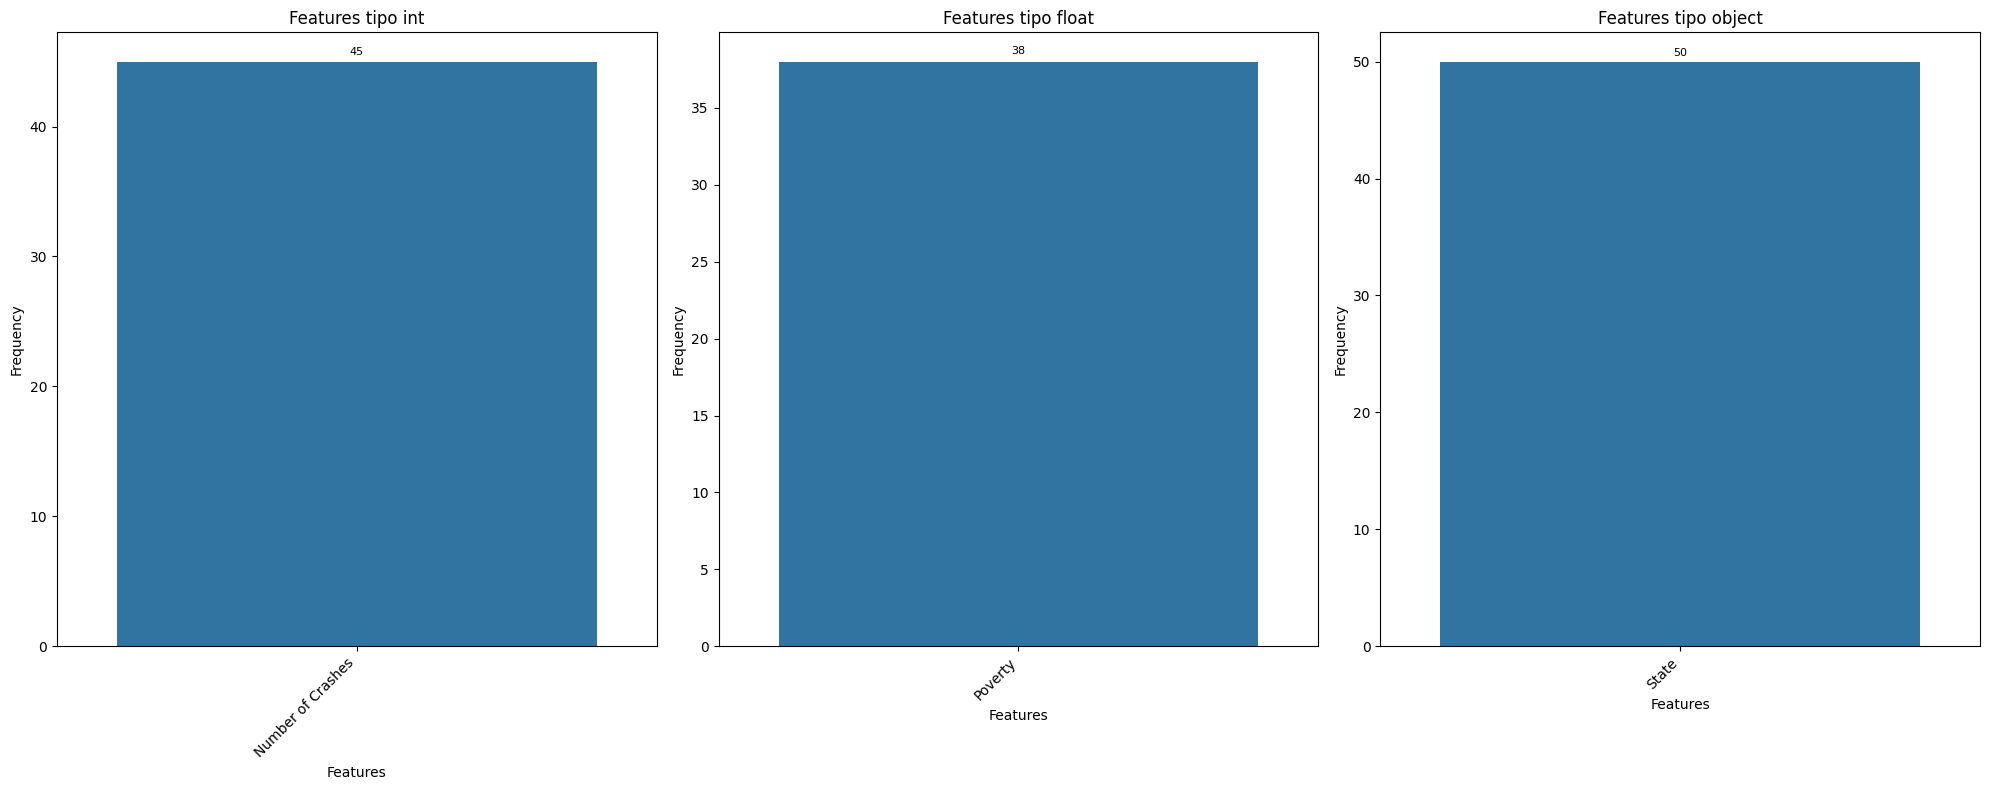

In [19]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 3, 1)
plot_feature_info(eda_crashpoverty.feature_info(df_crashpoverty, "int"), 'Features tipo int', "Frequency", 0.5)

plt.subplot(1, 3, 2)
plot_feature_info(eda_crashpoverty.feature_info(df_crashpoverty, "float"), 'Features tipo float', "Frequency", 0.5)

plt.subplot(1, 3, 3)
plot_feature_info(eda_crashpoverty.feature_info(df_crashpoverty, "object"), 'Features tipo object', "Frequency", 0.5)

plt.tight_layout()
plt.show()

### Quality Analysis

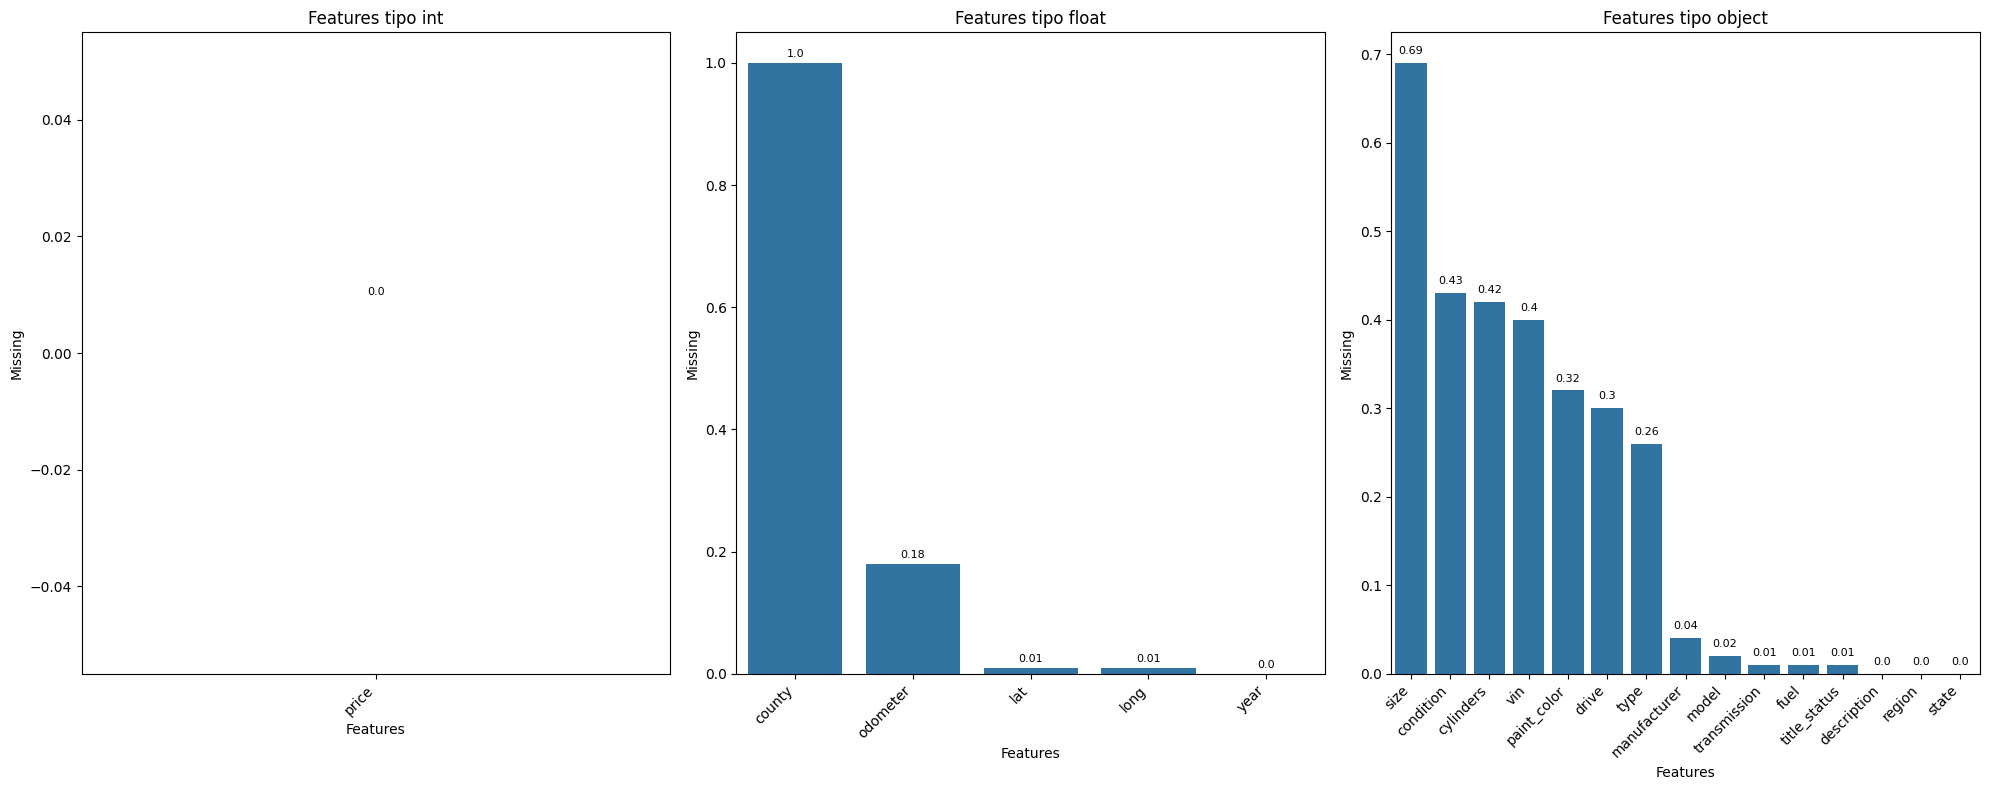

In [20]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 3, 1)
plot_feature_info(eda_vehicles.missinginformation_info(df_vehicles, "int"), 'Features tipo int', "Missing", 0.01)

plt.subplot(1, 3, 2)
plot_feature_info(eda_vehicles.missinginformation_info(df_vehicles, "float"), 'Features tipo float', "Missing",0.01)

plt.subplot(1, 3, 3)
plot_feature_info(eda_vehicles.missinginformation_info(df_vehicles, "object"), 'Features tipo object', "Missing",0.01)

plt.tight_layout()
plt.show()

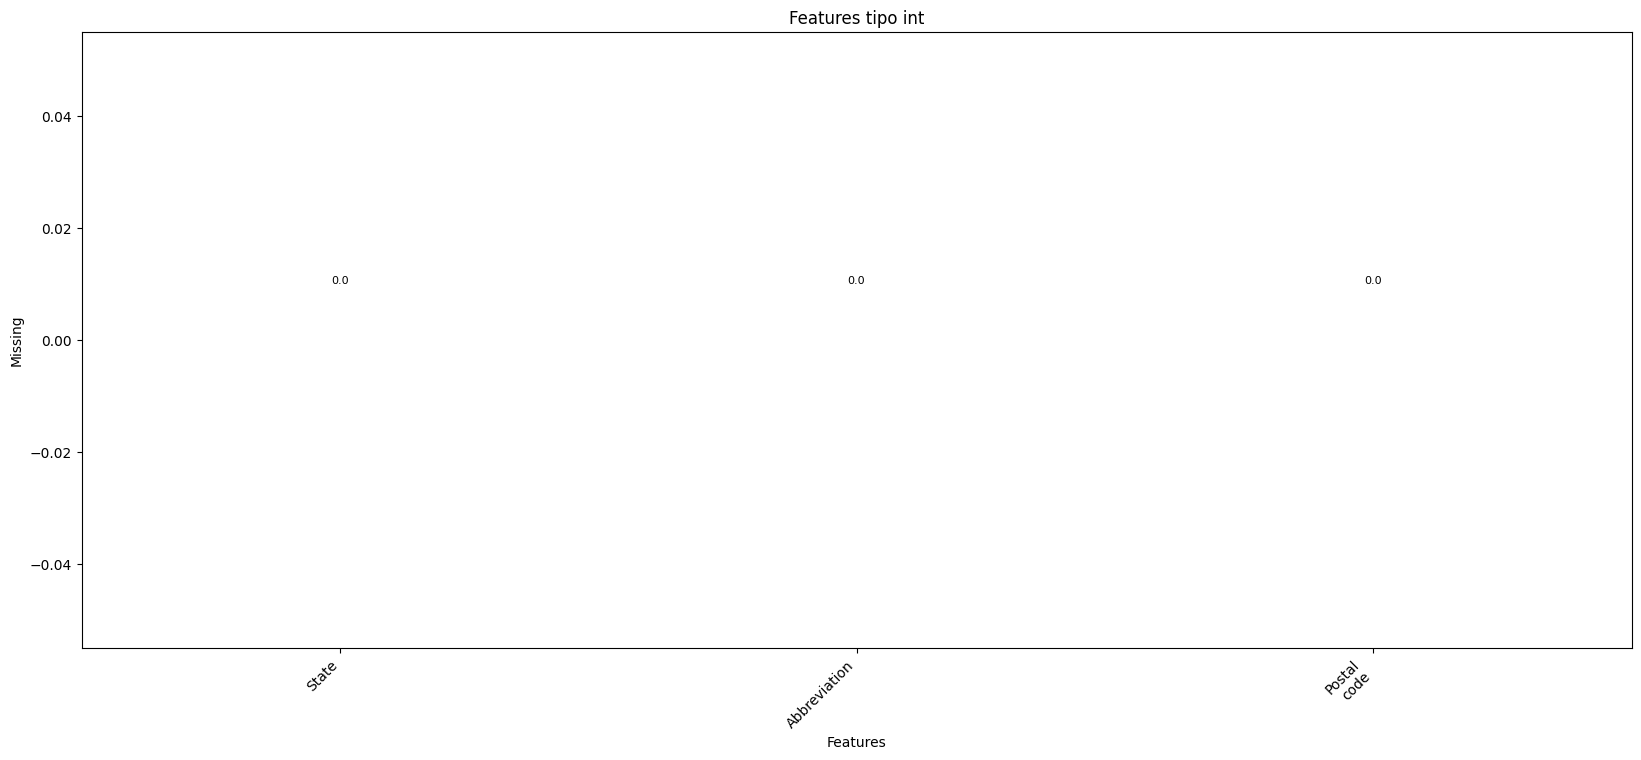

In [21]:
plt.figure(figsize=(20, 8))

plot_feature_info(eda_counties.missinginformation_info(df_counties, "object"), 'Features tipo int', "Missing", 0.01)

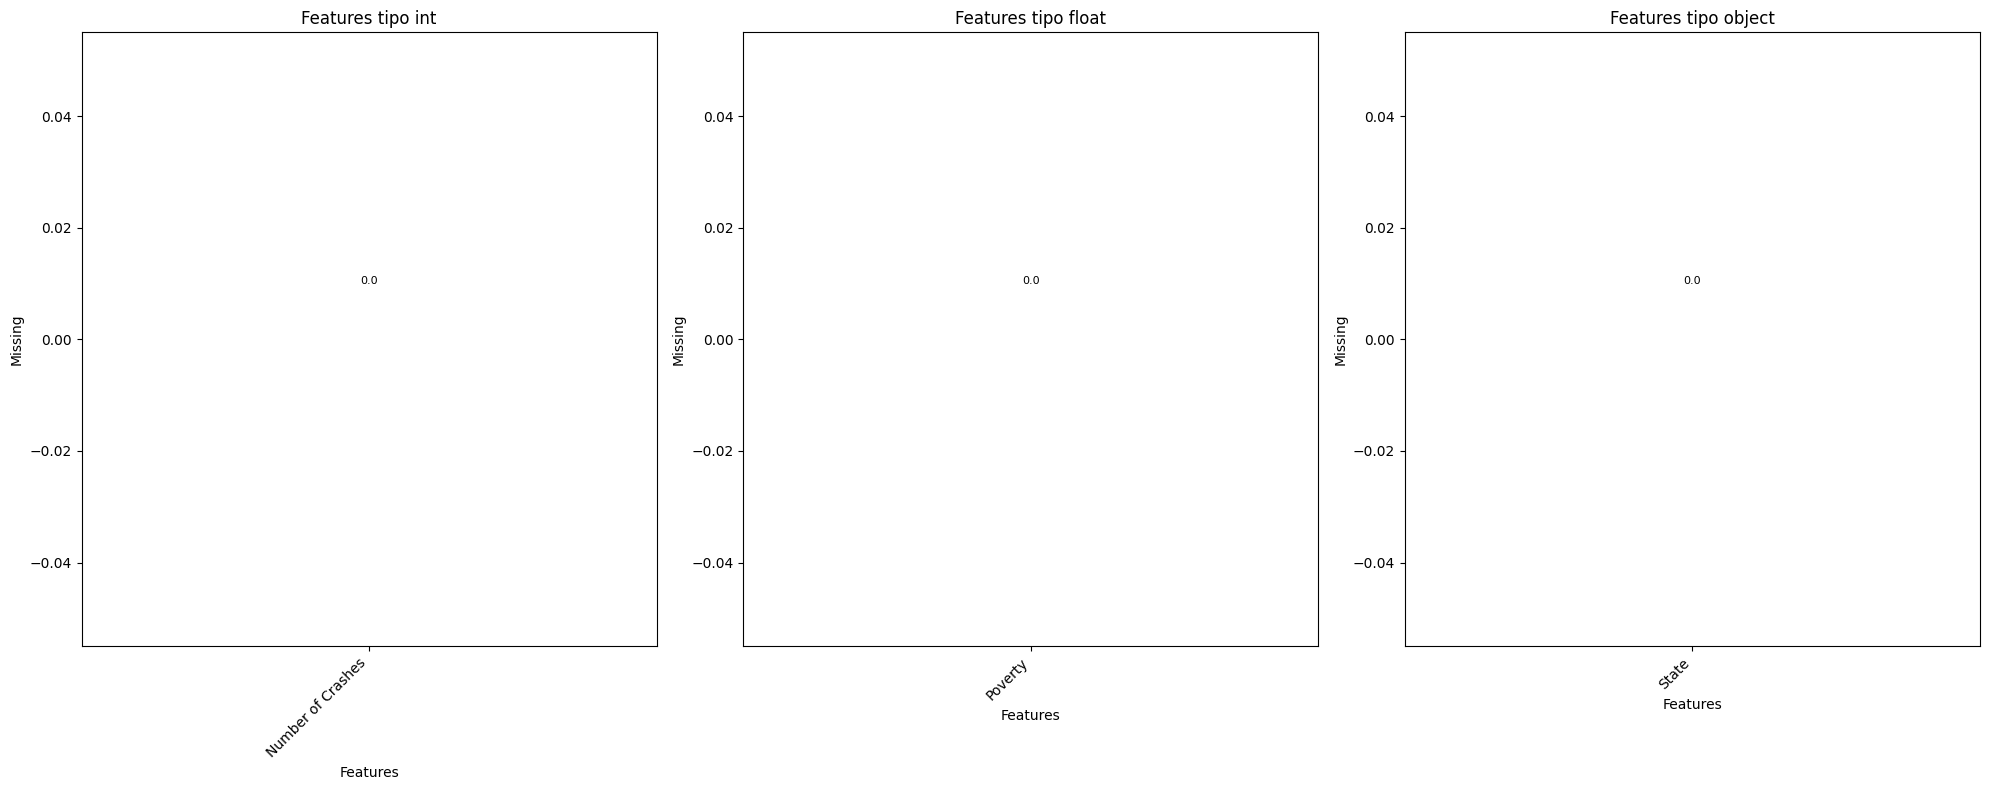

In [22]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 3, 1)
plot_feature_info(eda_crashpoverty.missinginformation_info(df_crashpoverty, "int"), 'Features tipo int', "Missing", 0.01)

plt.subplot(1, 3, 2)
plot_feature_info(eda_crashpoverty.missinginformation_info(df_crashpoverty, "float"), 'Features tipo float', "Missing", 0.01)

plt.subplot(1, 3, 3)
plot_feature_info(eda_crashpoverty.missinginformation_info(df_crashpoverty, "object"), 'Features tipo object', "Missing", 0.01)

plt.tight_layout()
plt.show()

Del análisis anterior podemos inferir algunas cosas. 

1. El conjunto de datos de vehículos es el que nos interesa, ésto dado que es justo de ahí de donde nos piden los análisis. 
2. Este conjunto es el que más features significativos tiene para poder llevar a cabo el resultado
3. Eliminar algunas de las variables que aporta más datos missing como "size", "condition", "cylinders". 
4. Los valores NAN de la variable VIN serán imputadas, en pro de abstraer el conocimiento de la diferencia de precio que puede entregar un mismo carro en diferentes ciudades.
5. Eliminar la variable region, ya que ésta se encuentra implícita en la variable state. Además, se ha visto que la variable también contiene datos no coherentes con lo que se infiere es la definición de una región

### Transformations

In [23]:
df_vehicles_transformed = df_vehicles_transformed.drop(["size", "condition", "cylinders", "region", "vin"], axis = 1)

for column in df_vehicles_transformed.columns:
    if df_vehicles_transformed[column].dtype == "O" and column != "vin":
        df_vehicles_transformed[column] = label_encoder.fit_transform(df_vehicles_transformed[column].tolist())

df_vehicles_transformed = df_vehicles_transformed.loc[~df_vehicles_transformed["odometer"].isna()]

In [24]:
df_vehicles_transformed.corr("spearman")

,price,year,manufacturer,model,fuel,odometer,title_status,transmission,state
price,1.000000,0.450019,-0.022068,0.022307,-0.145048,-0.404349,-0.035816,0.093686,-0.032916
year,0.450019,1.000000,-0.014064,0.010339,0.081166,-0.667481,0.021500,0.049317,-0.015903
manufacturer,-0.022068,-0.014064,1.000000,-0.024113,-0.037336,0.010815,0.019084,0.052024,-0.007211
model,0.022307,0.010339,-0.024113,1.000000,0.053127,0.026049,-0.014488,-0.033095,0.013616
fuel,-0.145048,0.081166,-0.037336,0.053127,1.000000,-0.094281,0.022789,0.016436,-0.033986
odometer,-0.404349,-0.667481,0.010815,0.026049,-0.094281,1.000000,-0.046226,-0.150837,0.060671
title_status,-0.035816,0.021500,0.019084,-0.014488,0.022789,-0.046226,1.000000,-0.015465,0.028919
transmission,0.093686,0.049317,0.052024,-0.033095,0.016436,-0.150837,-0.015465,1.000000,-0.042563
state,-0.032916,-0.015903,-0.007211,0.013616,-0.033986,0.060671,0.028919,-0.042563,1.000000


array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >]], dtype=object)

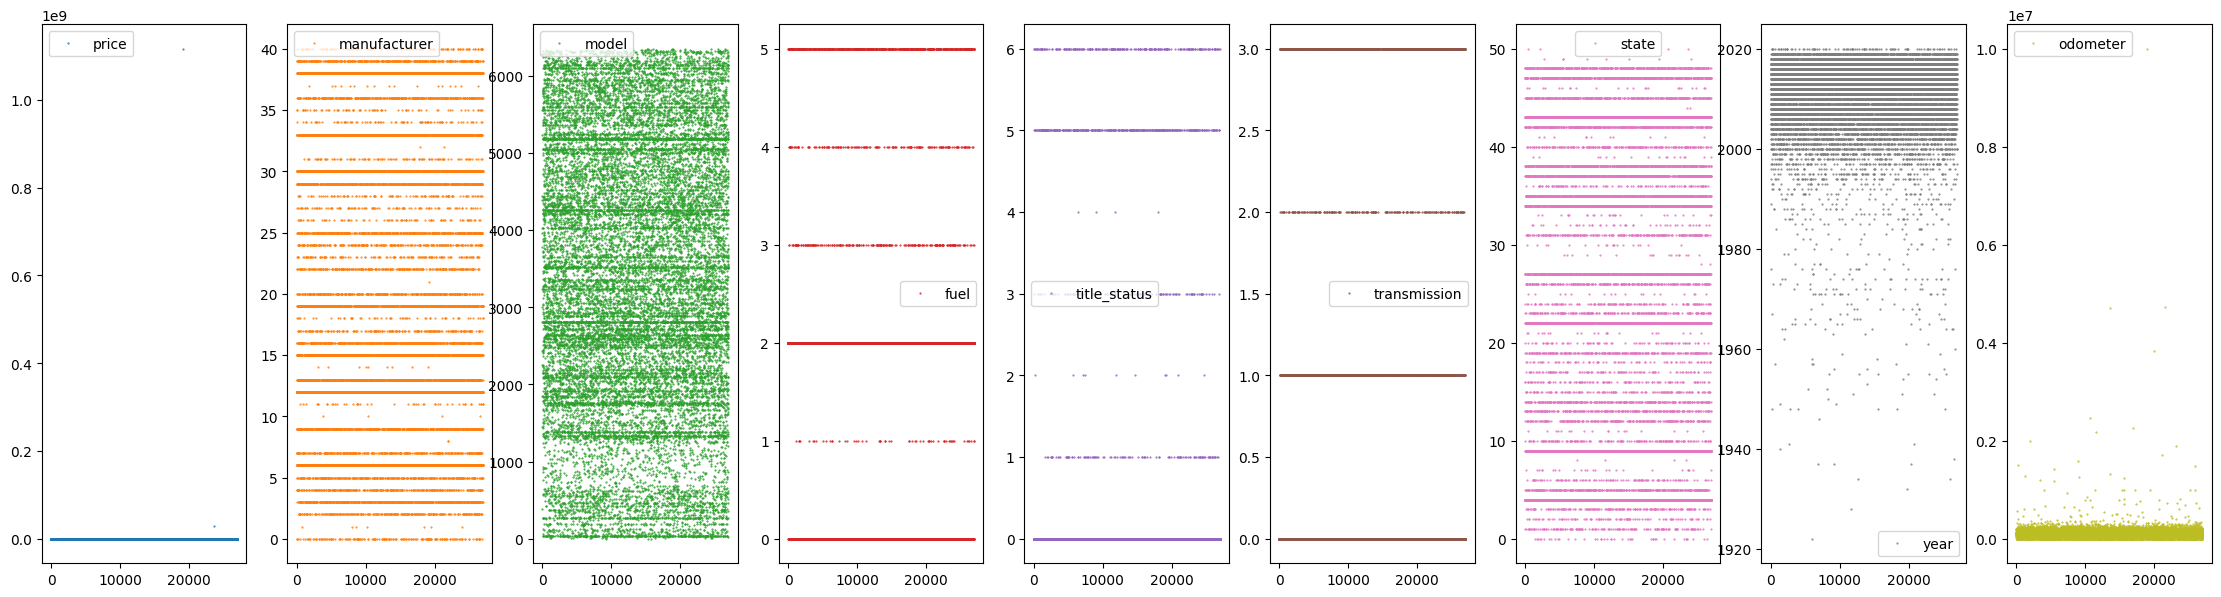

In [25]:
eda_vehicles_transformed = PreprocessEda()
new_structure_info = eda_vehicles_transformed.structtype_info(df_vehicles_transformed).to_dataframe()
numerical_columns_anomalies = new_structure_info.loc[new_structure_info["datatypes"] == "int64"]["columns"].values.tolist()[0] + new_structure_info.loc[new_structure_info["datatypes"] == "float64"]["columns"].values.tolist()[0]
df_vehicles_transformed[numerical_columns_anomalies].plot(lw=0, marker=".", subplots=True, layout=(-1, 9), figsize=(28, 7), markersize=1)

In [26]:
df_vehicles_transformed['price'] = np.log1p(df_vehicles_transformed['price'])
df_vehicles_transformed['odometer'] = np.log1p(df_vehicles_transformed['odometer'])

array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >]], dtype=object)

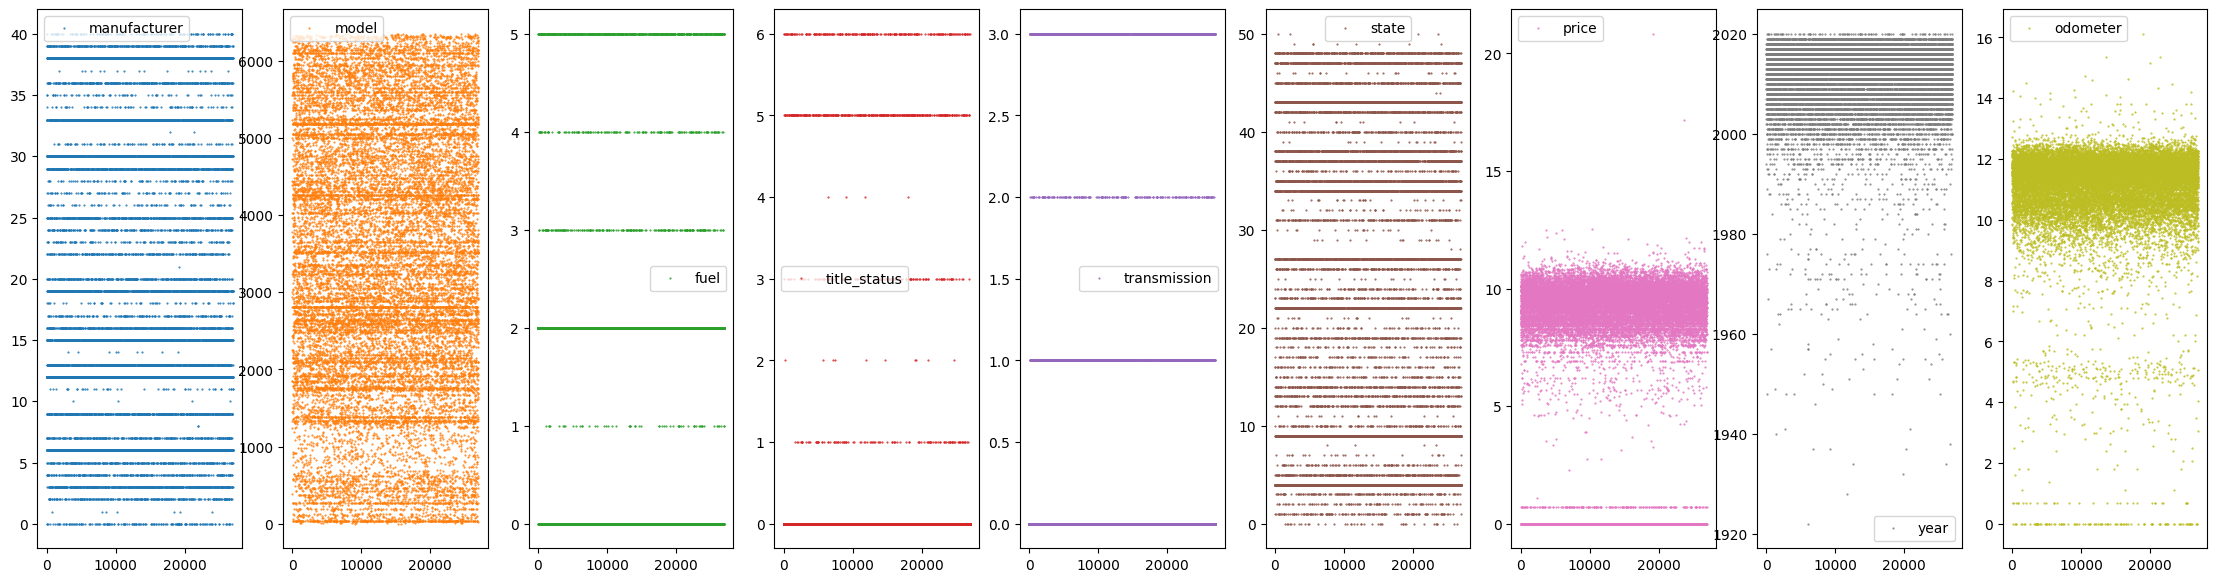

In [27]:
new_structure_info = eda_vehicles_transformed.structtype_info(df_vehicles_transformed).to_dataframe()
numerical_columns_anomalies = new_structure_info.loc[new_structure_info["datatypes"] == "int64"]["columns"].values.tolist()[0] + new_structure_info.loc[new_structure_info["datatypes"] == "float64"]["columns"].values.tolist()[0]
df_vehicles_transformed[numerical_columns_anomalies].plot(lw=0, marker=".", subplots=True, layout=(-1, 9), figsize=(28, 7), markersize=1)

Finalmente se eliminan las variables con mayor número de rows en missing ya que imputarlas puede ser un proceso que añada ruido o sesgo al modelo. También se realiza un cálculo de varibles anómalas y se encuentran un par de ellos en las columnas price y odometer. Estos valores, aunque podrían eliminarse para eliminar el ruido sobre el modelo lo que se decide es normalizar usando log - 1 ya que esto nos permite estabilizar la varianza y reducir la asimetría en los datos. También se buscaron características que estuvieran correlacionadas, sin embargo, no se encontraron variables que estuvieran altamente correlacionadas.

## Training Model

In [28]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

X = df_vehicles_transformed.drop(["price"], axis=1)
y = df_vehicles_transformed["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
reg = XGBRegressor()
reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [30]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print(f"MAE error: {mean_absolute_error(y_test.tolist(), reg.predict(X_test).tolist())}")
print(f"MSE error: {mean_squared_error(y_test.tolist(), reg.predict(X_test).tolist())}")
print(f"RMSE error: {np.sqrt(mean_squared_error(y_test.tolist(), reg.predict(X_test).tolist()))}")

MAE error: 1.620096357193443
MSE error: 7.527923723050606
RMSE error: 2.7437062020286733


In [31]:
reg = XGBRegressor()

params_grid = {
    'eta': [0.01, 0.03, 0.1],
    'max_depth': [11, 13],
    'subsample': [0.3, 0.5, 1],
    'tree_method': ["auto", "exact", "approx"],
    'lambda': [1, 1.5],
    'alpha': [0.2, 0.4,],
    'eval_metric': ["rmse", "mae", "mape", "rmsle"]
}

random_search = GridSearchCV(estimator=reg, param_grid=params_grid, cv=4, n_jobs=-1, verbose=2)

grid_result = random_search.fit(X_train, y_train)


Fitting 4 folds for each of 864 candidates, totalling 3456 fits
[CV] END alpha=0.2, eta=0.01, eval_metric=rmse, lambda=1, max_depth=11, subsample=0.3, tree_method=auto; total time=   1.4s
[CV] END alpha=0.2, eta=0.01, eval_metric=rmse, lambda=1, max_depth=11, subsample=0.3, tree_method=auto; total time=   1.6s
[CV] END alpha=0.2, eta=0.01, eval_metric=rmse, lambda=1, max_depth=11, subsample=0.3, tree_method=auto; total time=   1.6s
[CV] END alpha=0.2, eta=0.01, eval_metric=rmse, lambda=1, max_depth=11, subsample=0.5, tree_method=auto; total time=   1.7s
[CV] END alpha=0.2, eta=0.01, eval_metric=rmse, lambda=1, max_depth=11, subsample=0.5, tree_method=auto; total time=   1.8s
[CV] END alpha=0.2, eta=0.01, eval_metric=rmse, lambda=1, max_depth=11, subsample=0.3, tree_method=approx; total time=   3.1s
[CV] END alpha=0.2, eta=0.01, eval_metric=rmse, lambda=1, max_depth=11, subsample=0.3, tree_method=approx; total time=   3.2s
[CV] END alpha=0.2, eta=0.01, eval_metric=rmse, lambda=1, max_de

In [36]:
best_model = grid_result.best_estimator_

print(f"MAE error: {mean_absolute_error(y_test.tolist(), best_model.predict(X_test))}")
print(f"MSE error: {mean_squared_error(y_test.tolist(), best_model.predict(X_test))}")
print(f"RMSE error: {np.sqrt(mean_squared_error(y_test.tolist(), best_model.predict(X_test)))}")

MAE error: 1.5636643318225398
MSE error: 7.319194479204761
RMSE error: 2.7054009830715966
